<a href="https://colab.research.google.com/github/Foysal348/Gradient-Boosting/blob/main/Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1:Import Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

## Step 2:Clone and load the dataset

In [20]:
!git clone https://github.com/Foysal348/Gradient-Boosting.git

Cloning into 'Gradient-Boosting'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), done.


In [21]:
%cd Gradient-Boosting

/content/Gradient-Boosting/Gradient-Boosting


In [22]:
!ls

multiple_linear_regression_dataset.csv	README.md


In [23]:
df = pd.read_csv("multiple_linear_regression_dataset.csv")

df.head()


,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


## Step 3: Understand the Dataset Structure

In [24]:
print("Dataset Shape",df.shape)
df.info()

Dataset Shape (20, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


In [25]:
#Check null values
df.isnull().sum()

,0
age,0
experience,0
income,0


## Step 4: Separate Features and Target

In [26]:
X=df.drop('income',axis=1)
y=df['income']
print(X,y)

    age  experience
0    25           1
1    30           3
2    47           2
3    32           5
4    43          10
5    51           7
6    28           5
7    33           4
8    37           5
9    39           8
10   29           1
11   47           9
12   54           5
13   51           4
14   44          12
15   41           6
16   58          17
17   23           1
18   44           9
19   37          10 0     30450
1     35670
2     31580
3     40130
4     47830
5     41630
6     41340
7     37650
8     40250
9     45150
10    27840
11    46110
12    36720
13    34800
14    51300
15    38900
16    63600
17    30870
18    44190
19    48700
Name: income, dtype: int64


## Step 5:Train Test Split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Train Test Split Complete")

Train Test Split Complete


## Step 6:Initialize and Train the Gradient Boosting Regressor

In [28]:
gbr=GradientBoostingRegressor(n_estimators=50,     # Number of boosting stages
                              learning_rate=0.2,   # Shrinkage factor
                              max_depth=1,         # Depth of each regression tree
                              random_state=42,
                              subsample=0.5,       # Depth of each regression tree
                              loss='squared_error' # Depth of each regression tree

                              )
gbr.fit(X_train,y_train)
y_pred=gbr.predict(X_test)


## Step 7:Evaluate Model Performance

In [30]:
#Mean Square Error
mse=mean_squared_error(y_test,y_pred)
print("Mean Square Error:",mse)

#Mean Absulate Error
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)

#R2 Score
r2=r2_score(y_test,y_pred)
print("R2 Score:",r2)


Mean Square Error: 576398.5736221992
Mean Absolute Error: 717.5464129690317
R2 Score: 0.9531338264805147


## Step 8: Feature Importance Extraction

In [31]:
feature_importance = pd.Series(
    gbr.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance

,0
experience,0.701543
age,0.298457


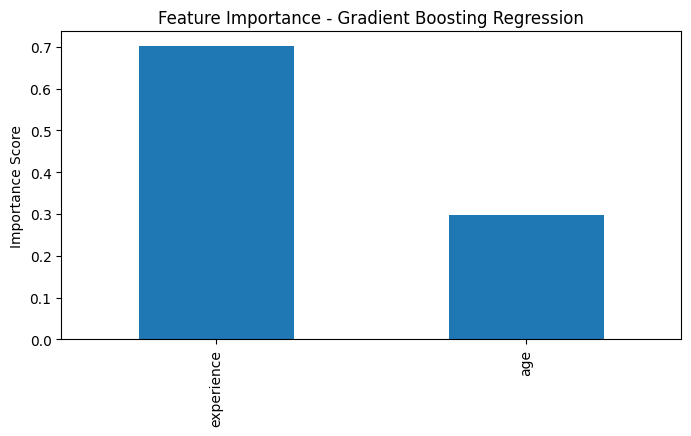

In [34]:
#Feature Importance
feature_importance.plot(kind="bar", figsize=(8,4))
plt.title("Feature Importance - Gradient Boosting Regression")
plt.ylabel("Importance Score")
plt.show()

## Step 9:Save the Model

In [35]:
import joblib

joblib.dump(gbr, "gradient_boosting_regression_model.pkl")

['gradient_boosting_regression_model.pkl']